**TASK: Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample**

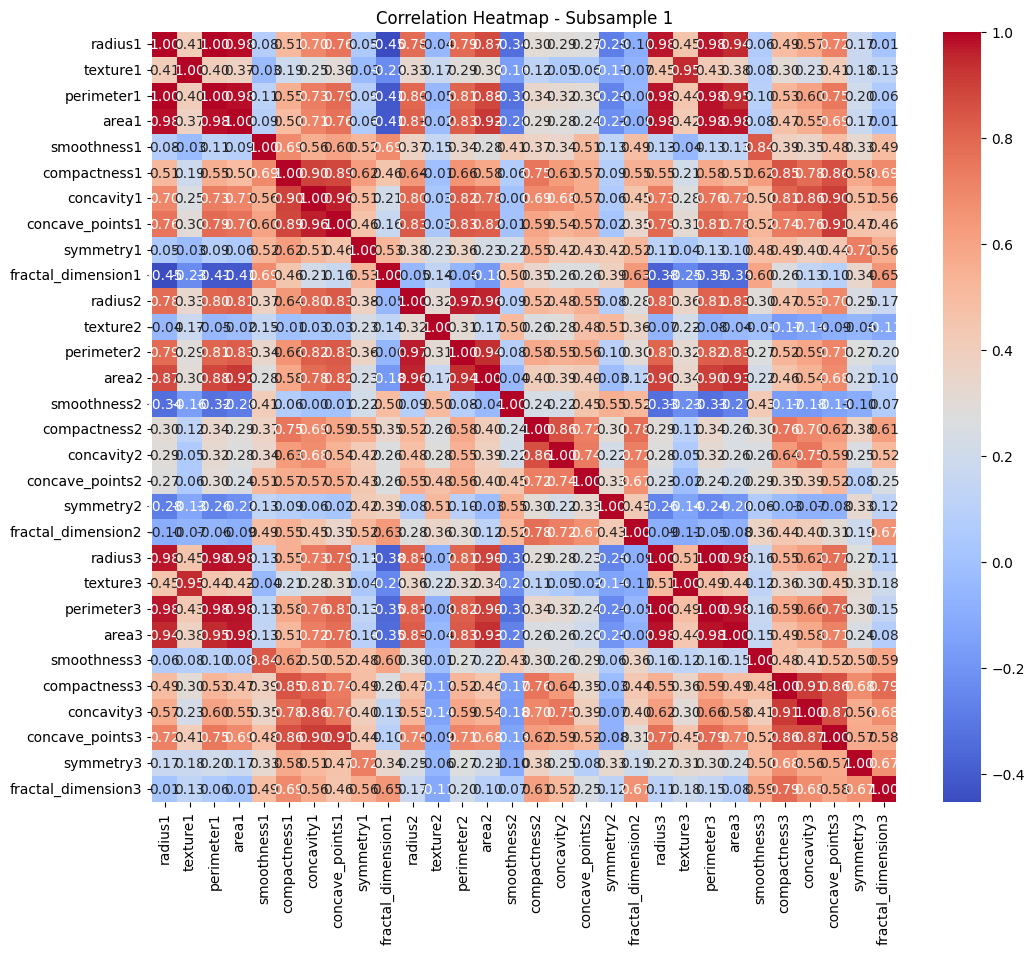

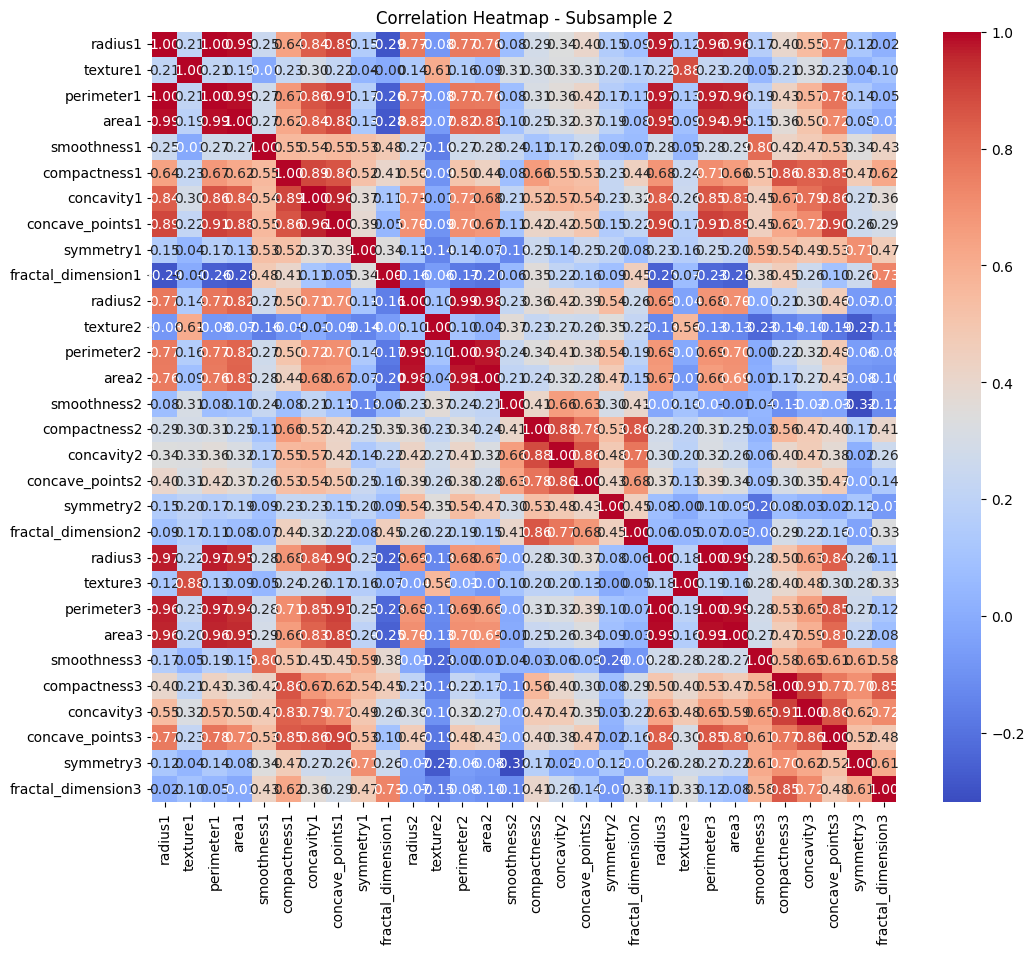

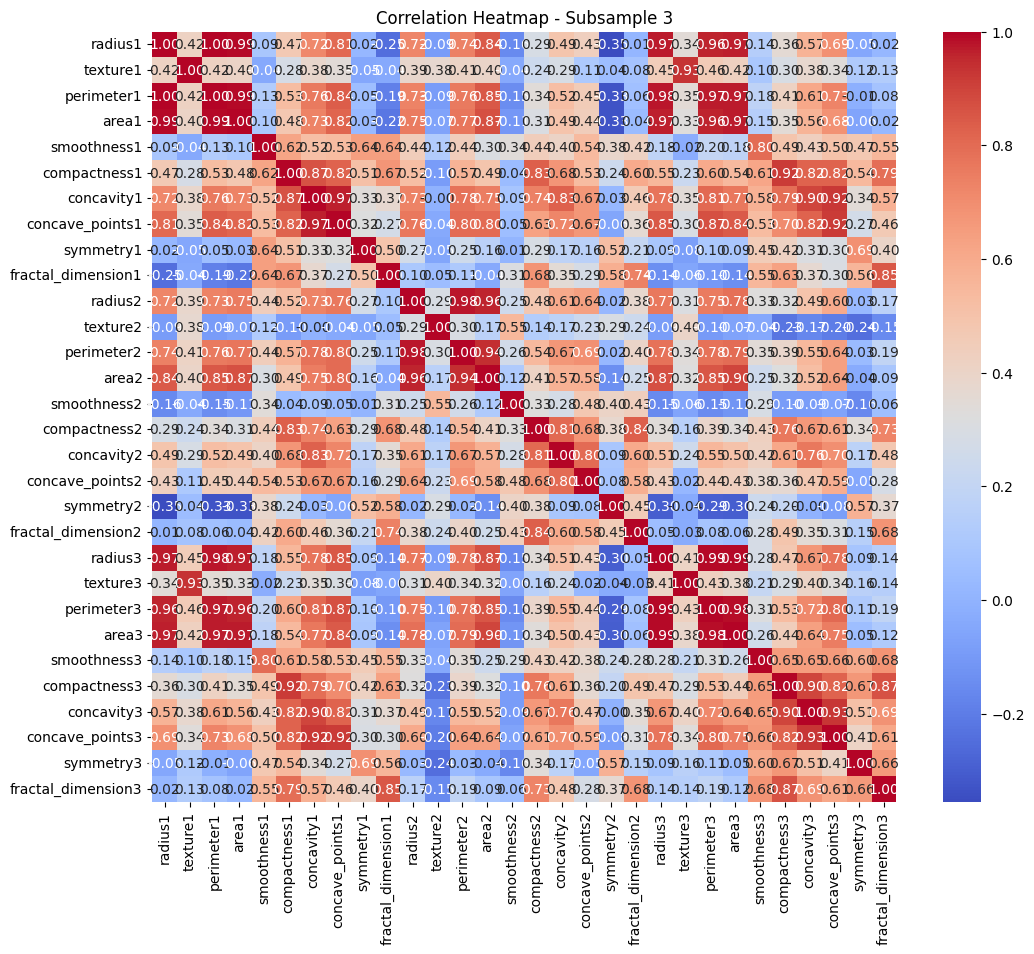

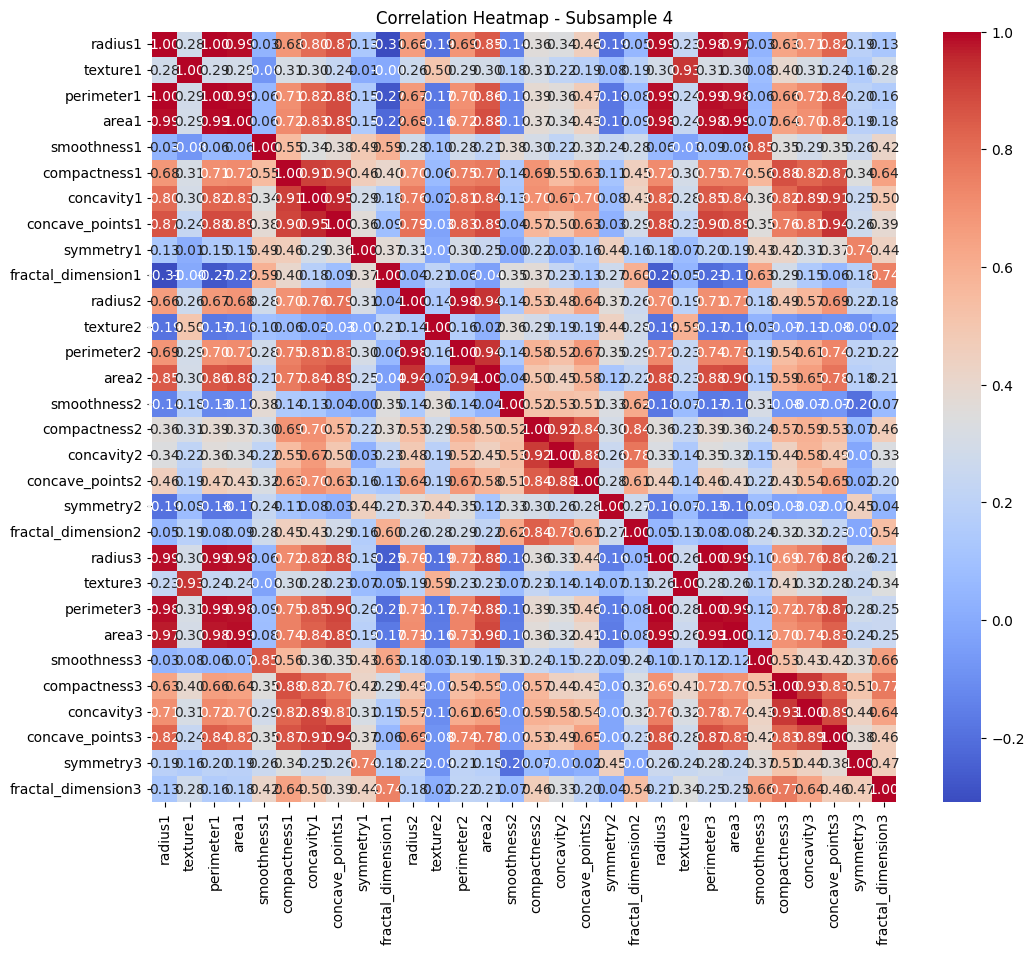

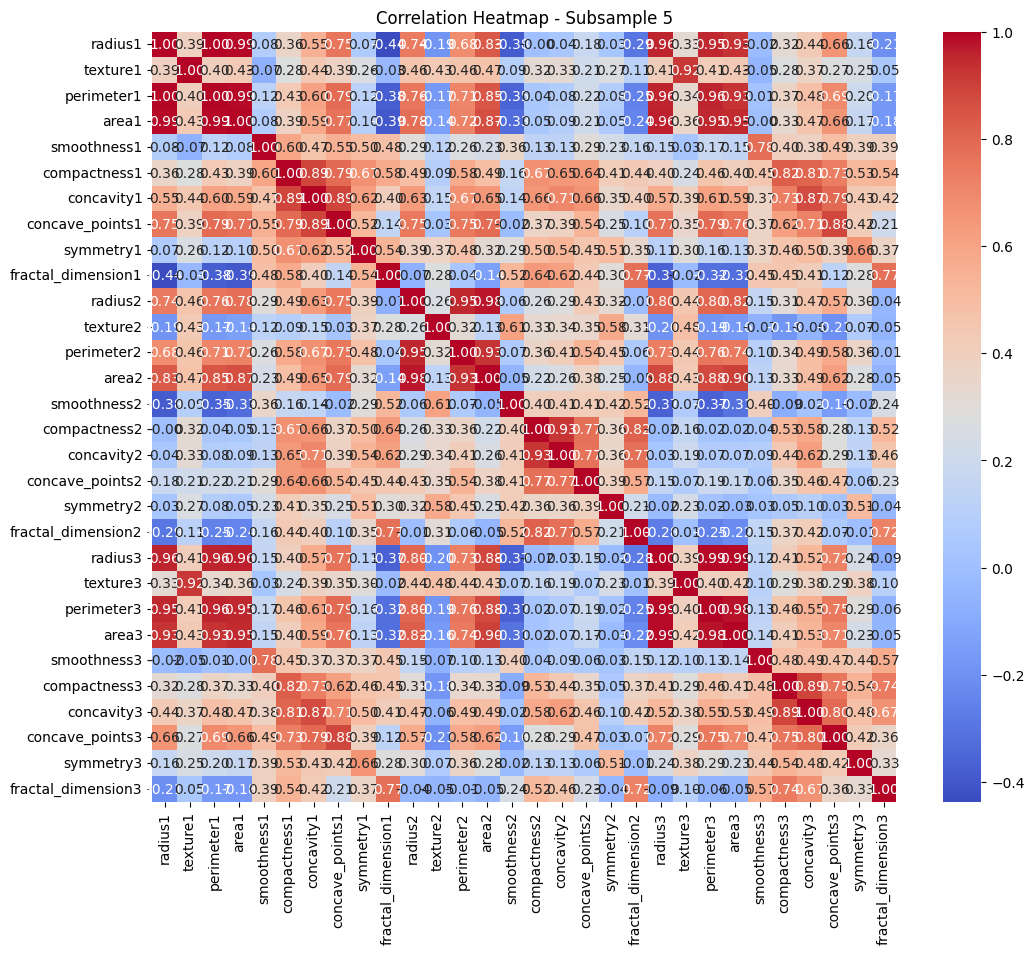

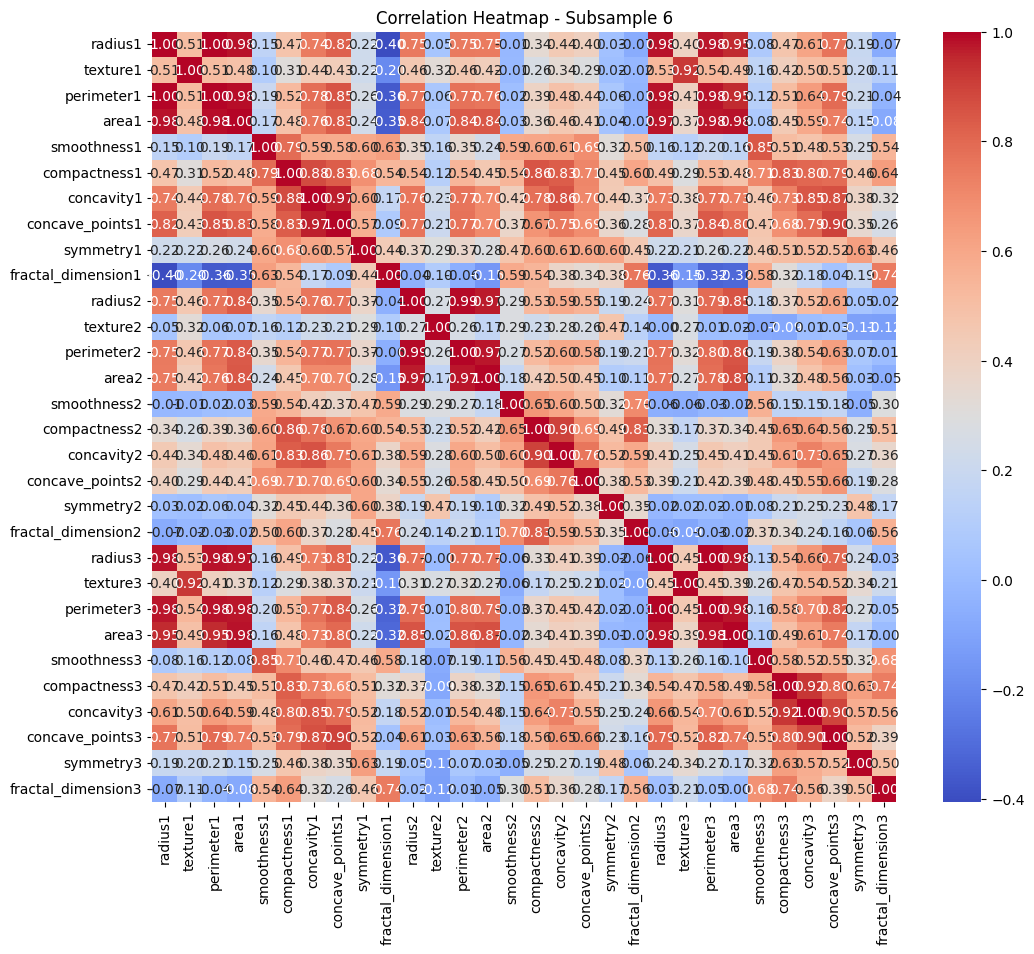

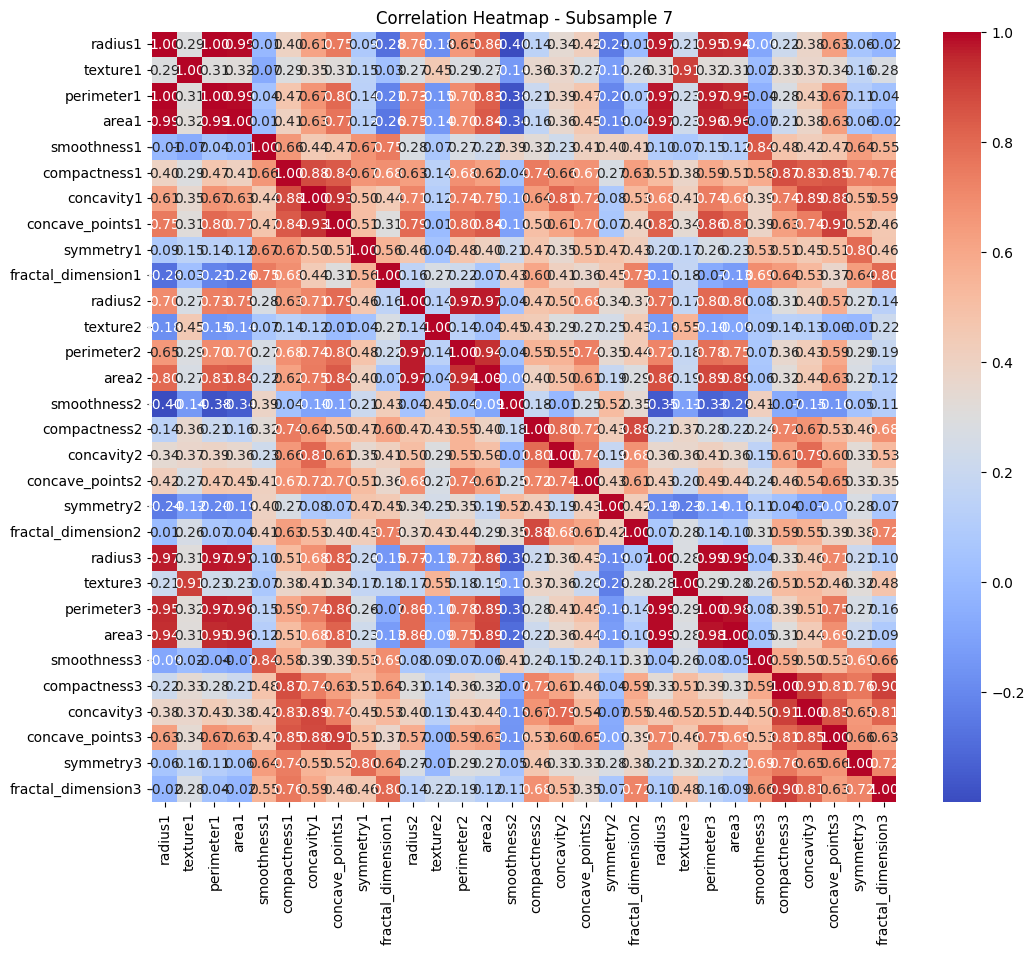

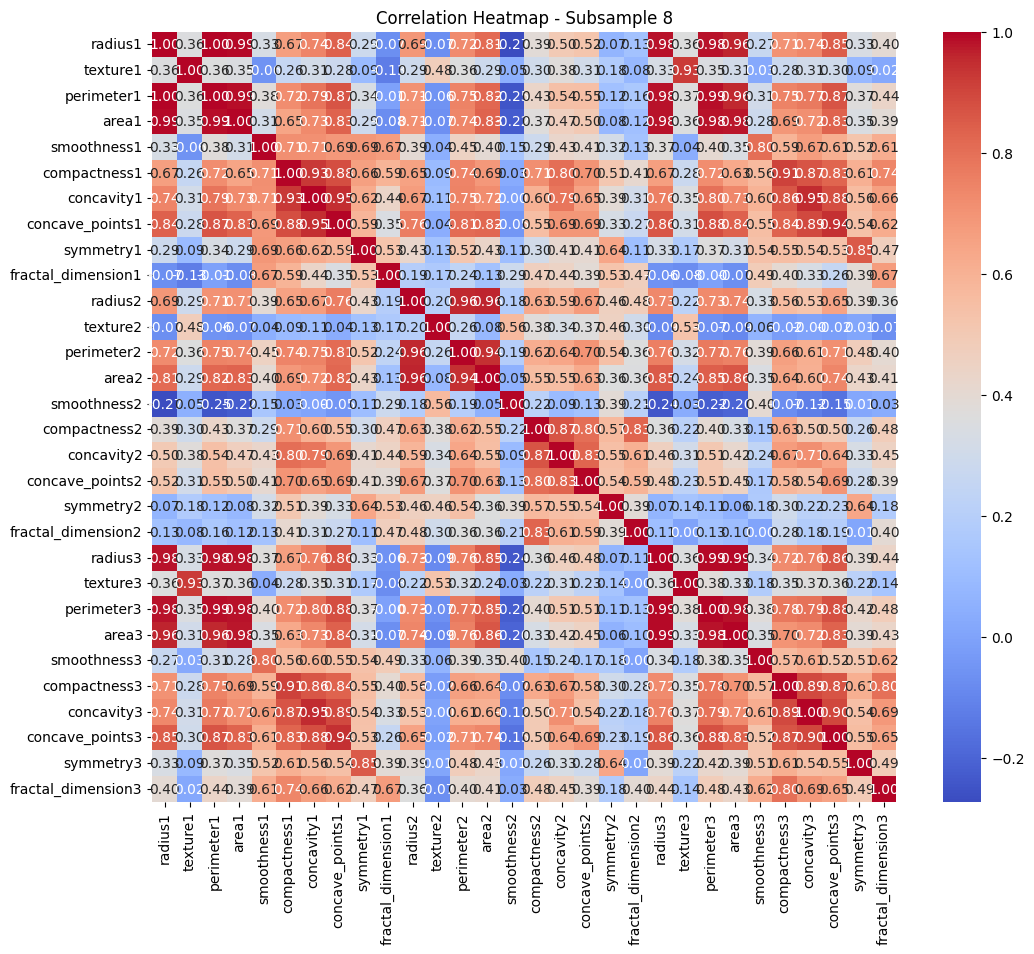

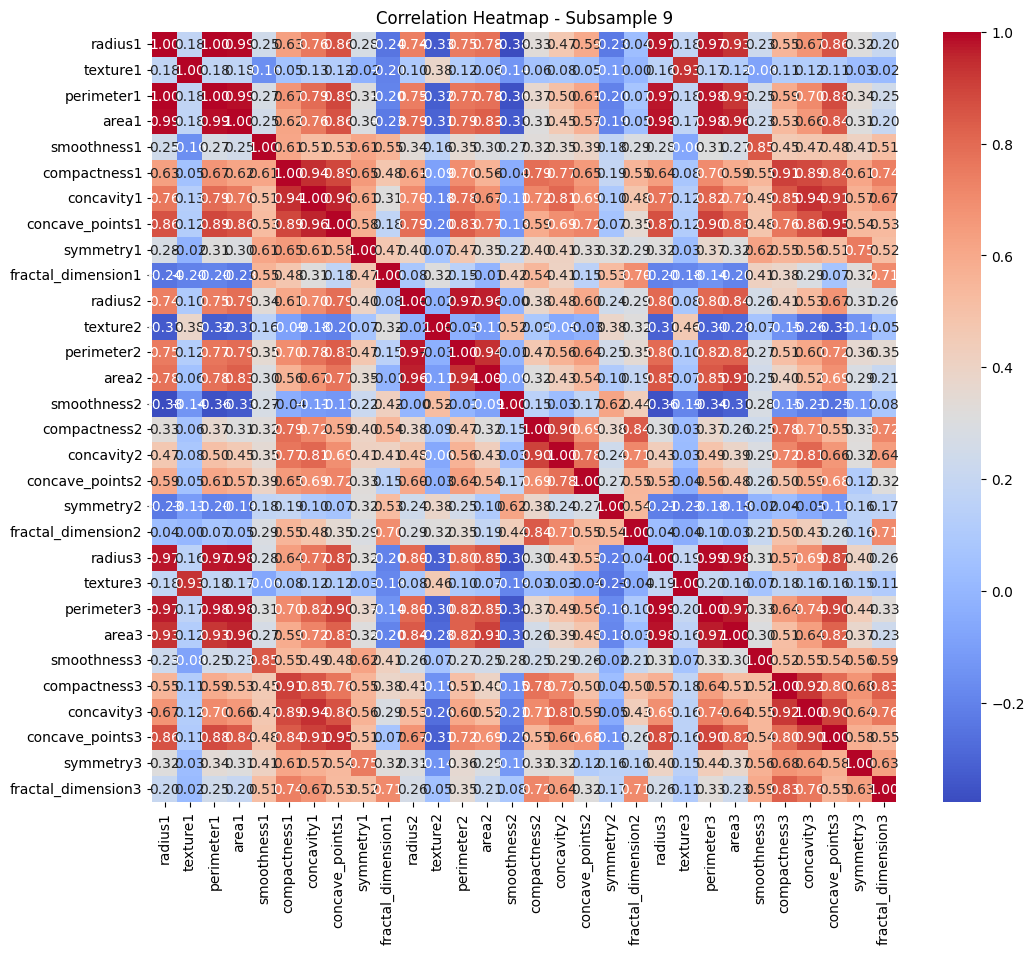

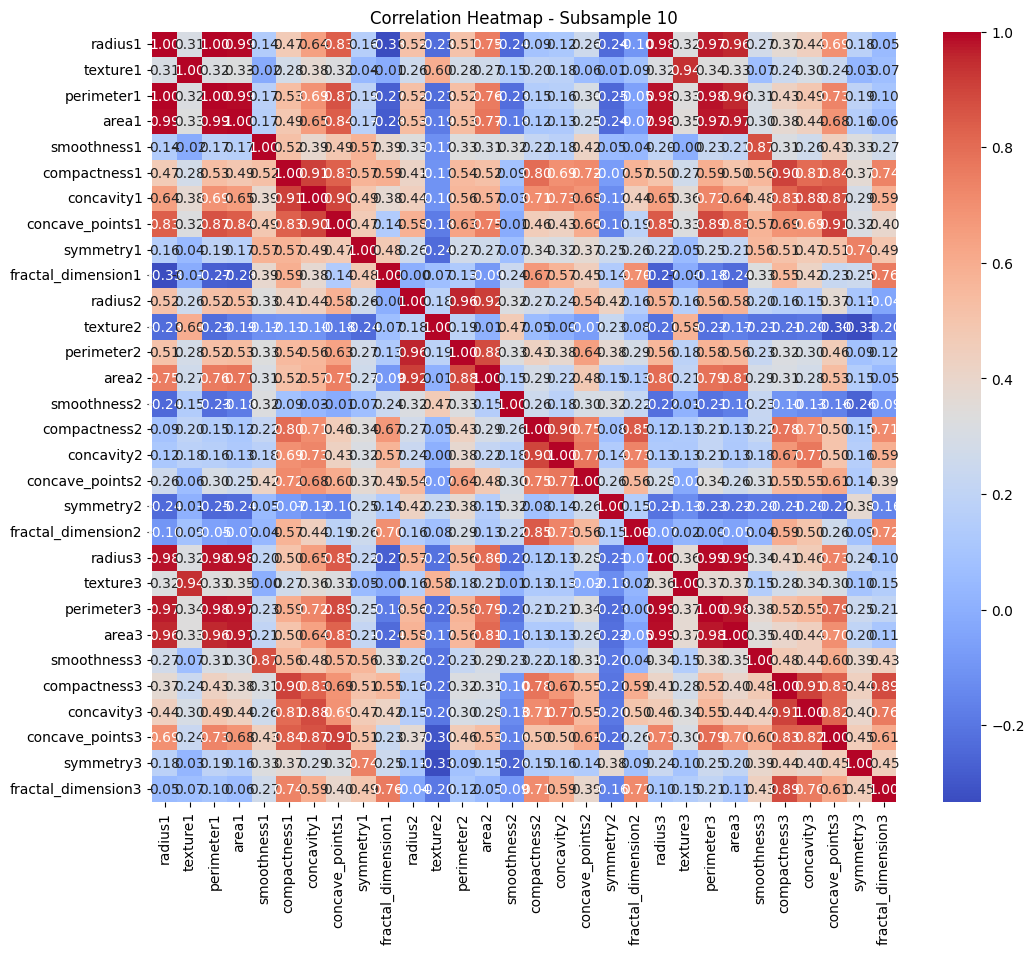

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch Jute Pest dataset
jute_pest = fetch_ucirepo(id=17)

# Combine features and targets into one DataFrame for analysis
X = jute_pest.data.features
y = jute_pest.data.targets
codon_usage = pd.concat([X, y], axis=1)

# Drop rows with non-numeric values
codon_usage_numeric = codon_usage.select_dtypes(include=[np.number])

# Define the number of subsamples
num_subsamples = 10

# Define the size of each subsample (moderately sized)
subsample_size = len(codon_usage_numeric) // num_subsamples

# Create a list to store the correlation plots
correlation_plots = []

# Randomly select subsamples and create correlation plots
for i in range(num_subsamples):
    # Randomly select rows for the subsample
    subsample_indices = np.random.choice(codon_usage_numeric.index, size=subsample_size, replace=False)

    # Extract the subsample from the dataset
    subsample = codon_usage_numeric.loc[subsample_indices]

    # Calculate the correlation matrix for the subsample
    correlation_matrix = subsample.corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap - Subsample {i+1}')
    plt.show()


**TASK (Classification | Applicable): If your problem is a classification problem visually check if the target variable is imbalanced**<br>
**TASK (Regression | N/A): If your problem is a regression problem visually the distribution of your target variabe**

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')


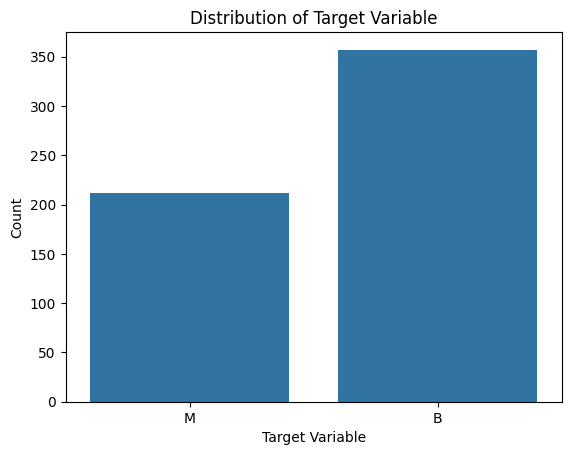

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(codon_usage.columns)

# Assuming the target variable column is named 'Diagnosis'
sns.countplot(x='Diagnosis', data=codon_usage)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**TASK: Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable**

In [14]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load the dataset
# codon_usage = pd.read_csv('codon_usage.csv')

# # Define the size of the subsample
# subsample_size = 1000

# # Create a random generator
# rng = np.random.default_rng()

# # Randomly select rows for the subsample
# subsample_indices = rng.choice(codon_usage.index, size=subsample_size, replace=False)

# # Extract the subsample from the dataset
# subsample = codon_usage.loc[subsample_indices]

# # Create pairplot
# sns.pairplot(subsample, hue='Kingdom')
# plt.title('Pairplot of Features vs. Target - Subsample')
# plt.show()

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

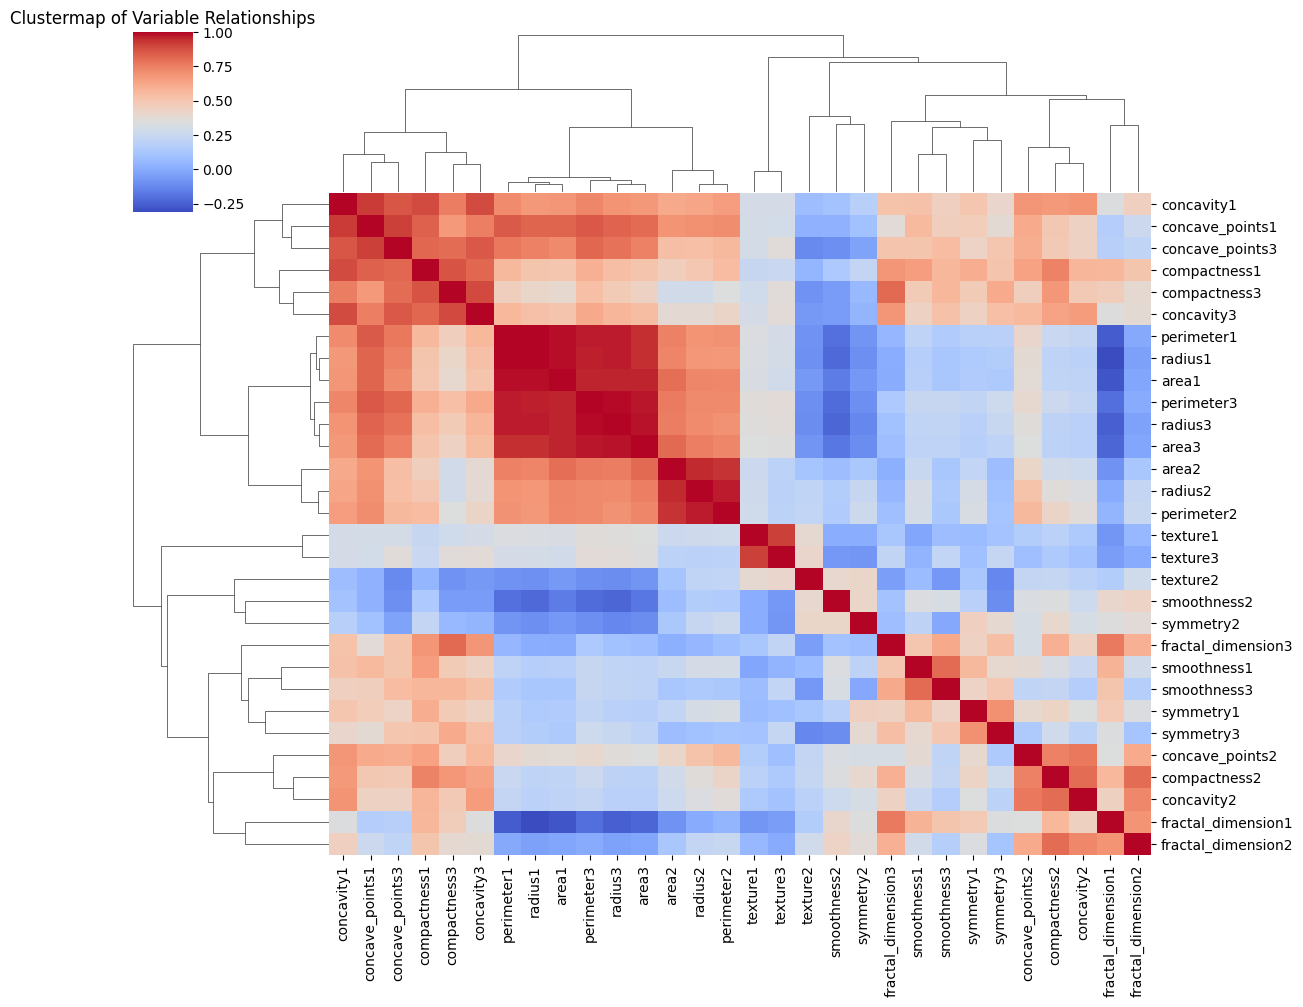

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
numeric_codon_usage = codon_usage.select_dtypes(include='number')

# Create the clustermap
sns.clustermap(numeric_codon_usage.corr(), cmap='coolwarm', figsize=(12, 10))
plt.title('Clustermap of Variable Relationships')
plt.show()

**TASK: Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR  # Import SVR for Support Vector Regression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare the Data
target_column = 'radius1'

# Extract features (X) and target (y)
X = codon_usage_numeric.drop(columns=['radius1'])
y = codon_usage_numeric[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Build a Baseline SVR Model
svr_baseline = SVR()
svr_baseline.fit(X_train, y_train)
baseline_predictions = svr_baseline.predict(X_test)

# Evaluate baseline model
print("Baseline SVR Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, baseline_predictions))
print("R-squared Score:", r2_score(y_test, baseline_predictions))

# 3. Tune Hyperparameters using GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear', 'poly']}
svr_grid_search = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
svr_grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", svr_grid_search.best_params_)

# 4. Evaluate Model Performance
grid_predictions = svr_grid_search.predict(X_test)

print("\nTuned SVR Model Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, grid_predictions))
print("R-squared Score:", r2_score(y_test, grid_predictions))


Baseline SVR Model Performance:
Mean Squared Error: 0.07926244374187544
R-squared Score: 0.9934419282473607
Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.031 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.126 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.085 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.062 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time=  27.4s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time=  30.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time=  29.5s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time=  23.5s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.999 total time=  25.4s
